# Data Processing

In [358]:
import json
import os
import pandas as pd
from pandas import json_normalize
import matplotlib.pyplot as plt
import os
import numpy as np
import neurokit2 as nk

In [359]:
import numpy as np
import pandas as pd
import neurokit2 as nk

def convert_to_dataframe(user_data, desired_sampling_rate=78):
    # Extract user details
    details = user_data["user_details"]
    name = details['name']
    
    # Create DataFrame for timestamp and feature signals
    df = pd.DataFrame({
        "timestamp": user_data["timestamp"],  # Assuming these timestamps are in milliseconds
        "ECG": user_data["ecg"],
        "GSR": user_data["gsr"],
        "PPG_red": user_data["ppg_red"],
        "PPG_ir": user_data["ppg_ir"],
        "PPG_green": user_data["ppg_green"],
        "absolute_time": user_data["absolute_time"]  # In seconds
    })
    
    # Calculate the sampling frequency directly from timestamps (in milliseconds, converted to seconds for rate calculation)
    time_diffs = np.diff(df['timestamp']) / 1000.0  # Convert differences to seconds
    avg_sampling_interval = np.mean(time_diffs)
    original_sampling_rate = np.floor(1 / avg_sampling_interval) if avg_sampling_interval > 0 else None
    
    print(f"Original Sampling Rate: {original_sampling_rate} Hz")
    
    # if original_sampling_rate is not None:
    #     # Resample signals and create a new DataFrame for resampled data
    #     resampled_data = {
    #         "ECG": nk.signal_resample(signal=df['ECG'].to_numpy(), 
    #                                   sampling_rate=original_sampling_rate, 
    #                                   desired_sampling_rate=desired_sampling_rate),
    #         "GSR": nk.signal_resample(signal=df['GSR'].to_numpy(), 
    #                                   sampling_rate=original_sampling_rate, 
    #                                   desired_sampling_rate=desired_sampling_rate),
    #         "PPG_red": nk.signal_resample(signal=df['PPG_red'].to_numpy(), 
    #                                       sampling_rate=original_sampling_rate, 
    #                                       desired_sampling_rate=desired_sampling_rate),
    #         "PPG_ir": nk.signal_resample(signal=df['PPG_ir'].to_numpy(), 
    #                                      sampling_rate=original_sampling_rate, 
    #                                      desired_sampling_rate=desired_sampling_rate),
    #         "PPG_green": nk.signal_resample(signal=df['PPG_green'].to_numpy(), 
    #                                         sampling_rate=original_sampling_rate, 
    #                                         desired_sampling_rate=desired_sampling_rate),
    #     }
        
        
            #     resampled_data = {
    #         "ECG": nk.signal_resample(signal=df['ECG'].to_numpy(), 
    #                                   sampling_rate=original_sampling_rate, 
    #                                   desired_sampling_rate=desired_sampling_rate),
    #         "GSR": nk.signal_resample(signal=df['GSR'].to_numpy(), 
    #                                   sampling_rate=original_sampling_rate, 
    #                                   desired_sampling_rate=desired_sampling_rate),
    #         "PPG_red": nk.signal_resample(signal=df['PPG_red'].to_numpy(), 
    #                                       sampling_rate=original_sampling_rate, 
    #                                       desired_sampling_rate=desired_sampling_rate),
    #         "PPG_ir": nk.signal_resample(signal=df['PPG_ir'].to_numpy(), 
    #                                      sampling_rate=original_sampling_rate, 
    #                                      desired_sampling_rate=desired_sampling_rate),
    #         "PPG_green": nk.signal_resample(signal=df['PPG_green'].to_numpy(), 
    #                                         sampling_rate=original_sampling_rate, 
    #                                         desired_sampling_rate=desired_sampling_rate),
    #     }
        # # Calculate new interval for absolute time in seconds
        # interval_seconds = 1.0 / desired_sampling_rate
        
        # # Generate new absolute timestamps based on the desired sampling rate
        # initial_absolute_time = df['absolute_time'].iloc[0]
        # new_length = len(resampled_data["ECG"])
        # resampled_absolute_times = [initial_absolute_time + i * interval_seconds for i in range(new_length)]
        
        # # Create a new DataFrame for the resampled data
        # resampled_df = pd.DataFrame(resampled_data)
        # resampled_df["absolute_time"] = resampled_absolute_times
        
        # # Update the DataFrame attributes to include user details and sampling frequency
        # resampled_df.attrs = {**details, "sampling_frequency": desired_sampling_rate}
        
        # return name, resampled_df

    # Handle case where original sampling rate could not be determined
    df.attrs = {**details, "sampling_frequency": original_sampling_rate}
    return name, df


In [360]:
FileNames = [
            # "Alysonn_2024-03-07_17-58-45",
            #  "Jared_2024-03-07_18-54-03",
            #  "Thomas_2024-03-07_19-47-05",
            #  "Lia Llorca_2024-03-05_19-04-49",
            #  "William Powell_2024-03-04_18-23-11",
             "Aaron Fainman_2024-03-12_15-20-57",
             "gabriella_2024-03-12_18-24-59",
             "Genaro_2024-03-12_16-06-10",
             "Joe_2024-03-12_17-36-10",
             "Kostas_2024-03-12_16-54-27",
             "shaushan_2024-03-12_19-32-25",
             ]

# Dictionary to hold DataFrames for each file
dataframes = {}

# Base path assumes files are one directory up from the current script's directory
base_path = os.path.join(os.getcwd(), '..')

# Loop through each file in FileNames
for file_name in FileNames:
    json_file_path = os.path.join(base_path, f"Data/{file_name}.json")  # Construct file path
    normalized_path = os.path.normpath(json_file_path)  # Normalize the path

    try:
        with open(normalized_path, 'r') as file:
            data = json.load(file)
        print(f"JSON data successfully loaded from {file_name}.")

        print("Data keys:" , data.keys())
            
        # Convert dictionary to pandas DataFrame
        names, df = convert_to_dataframe(data)
        
        # Store the DataFrame in the dictionary
        dataframes[names] = df

    except Exception as e:
        print(f"Failed to load JSON data from {file_name}: {e}")

JSON data successfully loaded from Aaron Fainman_2024-03-12_15-20-57.
Data keys: dict_keys(['user_details', 'timestamp', 'absolute_time', 'ecg', 'gsr', 'ppg_red', 'ppg_ir', 'ppg_green', 'temp'])
Original Sampling Rate: 80.0 Hz
JSON data successfully loaded from gabriella_2024-03-12_18-24-59.
Data keys: dict_keys(['user_details', 'timestamp', 'absolute_time', 'ecg', 'gsr', 'ppg_red', 'ppg_ir', 'ppg_green', 'temp'])
Original Sampling Rate: 79.0 Hz
JSON data successfully loaded from Genaro_2024-03-12_16-06-10.
Data keys: dict_keys(['user_details', 'timestamp', 'absolute_time', 'ecg', 'gsr', 'ppg_red', 'ppg_ir', 'ppg_green', 'temp'])
Original Sampling Rate: 77.0 Hz
JSON data successfully loaded from Joe_2024-03-12_17-36-10.
Data keys: dict_keys(['user_details', 'timestamp', 'absolute_time', 'ecg', 'gsr', 'ppg_red', 'ppg_ir', 'ppg_green', 'temp'])
Original Sampling Rate: 79.0 Hz
JSON data successfully loaded from Kostas_2024-03-12_16-54-27.
Data keys: dict_keys(['user_details', 'timestamp',

In [361]:
FileTime = [
            # "allyson-burba_subject-3_starttime-1709832653.3539333",
            # "jared-joselowitz_subject-4_starttime-1709835964.3583503",
            # "thomas-auguste_subject-5_starttime-1709839154.9869092",
            # "lia-llorca_subject-2_starttime-1709663763.6199603",
            # "will-powell_subject-0_starttime-1709575216.1554863",
            "aaron_subject-6_starttime-1710255164.7718544",
            "ziyun-fu_subject-10_starttime-1710266215.2685192",
            "gennaro-sorrentino_subject-7_starttime-1710257714.902967",
            "xinyi-zheng_subject-9_starttime-1710263294.17601",
            "kostas-rotas_subject-8_starttime-1710260801.7820604",
            "shaushan-11_starttime-1710268994.271387"
            ]

data_time = {}
for filetime in FileTime:
    json_file_path = os.path.join(base_path, f"Data/Time Data/{filetime}.json")  # Construct file path
    normalized_path = os.path.normpath(json_file_path)  # Normalize the path
    filetimename = filetime.split("-")[0]
    try:
        with open(normalized_path, 'r') as file:
            data_time[filetimename] = json.load(file)
            print(filetimename)
        print(f"JSON data successfully loaded from {filetime}.")
    

    except Exception as e:
        print(f"Failed to load JSON data from {filetime}: {e}")
        
Name = 'shaushan'
name = 'shaushan'

# FileNames = ["Alysonn_2024-03-07_17-58-45",
#              "Jared_2024-03-07_18-54-03",
#              "Thomas_2024-03-07_19-47-05",
#              "Lia Llorca_2024-03-05_19-04-49",
#              "William Powell_2024-03-04_18-23-11",
#              "Aaron Fainman_2024-03-12_15-20-57",
#              "gabriella_2024-03-12_18-24-59",
#              "Genaro_2024-03-12_16-06-10",
#              "Joe_2024-03-12_17-36-10",
#              "Kostas_2024-03-12_16-54-27",
#              "shaushan_2024-03-12_19-32-25"
#              ]
# FileTime = [
#             "allyson-burba_subject-3_starttime-1709832653.3539333",
#             "jared-joselowitz_subject-4_starttime-1709835964.3583503",
#             "thomas-auguste_subject-5_starttime-1709839154.9869092",
#             "lia-llorca_subject-2_starttime-1709663763.6199603",
#             "will-powell_subject-0_starttime-1709575216.1554863",
#             "aaron_subject-6_starttime-1710255164.7718544",
#             "ziyun-fu_subject-10_starttime-1710266215.2685192",
#             "gennaro-sorrentino_subject-7_starttime-1710257714.902967",
#             "xinyi-zheng_subject-9_starttime-1710263294.17601",
#             "kostas-rotas_subject-8_starttime-1710260801.7820604",
#             "shaushan-11_starttime-1710268994.271387"
#             ]
start_times = data_time[name]['time_recordings'][0]['video_start_time']
end_times = data_time[name]['time_recordings'][0]['video_end_time']
conditions = {
    1: 1, 2: 1, 3: 1, 5: 1, 11: 1, 12: 1, 13: 1, 14: 1,
    16: 2, 17: 2, 18: 2, 20: 2, 22: 2, 23: 2, 24: 2, 25: 2, 26: 2, 27: 2, 28: 2, 29: 2, 30: 2,
    31: 3, 32: 3, 33: 3, 38: 3, 39: 3, 41: 3, 44: 3, 45: 3,
    48: 4, 51: 4, 52: 4, 53: 4, 54: 4, 55: 4, 56: 4, 57: 4, 58: 4, 59: 4, 60: 4,
    62: 1, 64: 1, 65: 1, 66: 1, 70: 1, 71: 1, 72: 1, 73: 1, 75: 1,
    76: 2, 77: 2, 81: 2, 83: 2, 85: 2, 86: 2, 88: 2,
    91: 3, 95: 3, 101: 3,
    110: 4, 114: 4, 119: 4, 120: 4
}

video_condition = []

for val in data_time[name]['time_recordings'][0]['video_name']:
    video_number = int(val.split(".")[0])  # Convert to integer for comparison
    condition = conditions.get(video_number)  # Use .get() to avoid KeyError if the number is not found
    if condition is not None:  # Only append if the condition was found
        video_condition.append(condition)


def get_condition_for_time(absolute_time, start_times, end_times, video_condition):
    for start, end, condition in zip(start_times, end_times, video_condition):
        if start <= absolute_time <= end:
            return condition
    return None

# Vectorize the condition assignment
dataframes[Name]['label'] = dataframes[Name]['absolute_time'].apply(lambda x: get_condition_for_time(x, start_times, end_times, video_condition))

# Now 'label' column in your DataFrame is populated based on the conditions
# Save the updated DataFrame to a CSV file
dataframes[Name].to_csv(f'{Name}_labeled.csv', index=False)
#

# Count the number of rows for each non-NaN 'label' type
label_counts = dataframes[Name]['label'].value_counts()

# Print the counts for each label type
print("Counts of rows for each non-NaN 'label' type:")
print(label_counts)

# Now 'label' column in your DataFrame is populated based on the conditions
# # Save the updated DataFrame to a CSV file
# dataframes[Name].to_csv(f'{Name}_labeled.csv', index=False)

aaron_subject
JSON data successfully loaded from aaron_subject-6_starttime-1710255164.7718544.
ziyun
JSON data successfully loaded from ziyun-fu_subject-10_starttime-1710266215.2685192.
gennaro
JSON data successfully loaded from gennaro-sorrentino_subject-7_starttime-1710257714.902967.
xinyi
JSON data successfully loaded from xinyi-zheng_subject-9_starttime-1710263294.17601.
kostas
JSON data successfully loaded from kostas-rotas_subject-8_starttime-1710260801.7820604.
shaushan
JSON data successfully loaded from shaushan-11_starttime-1710268994.271387.
Counts of rows for each non-NaN 'label' type:
label
1.0    23845
4.0    19076
2.0    14309
3.0    14306
Name: count, dtype: int64


In [362]:
print(dataframes[Name].attrs['sampling_frequency'])

79.0


In [363]:
start_times = data_time[name]['time_recordings'][0]['video_start_time']
end_times = data_time[name]['time_recordings'][0]['video_end_time']
conditions = {
    1: 1, 2: 1, 3: 1, 5: 1, 11: 1, 12: 1, 13: 1, 14: 1,
    16: 2, 17: 2, 18: 2, 20: 2, 22: 2, 23: 2, 24: 2, 25: 2, 26: 2, 27: 2, 28: 2, 29: 2, 30: 2,
    31: 3, 32: 3, 33: 3, 38: 3, 39: 3, 41: 3, 44: 3, 45: 3,
    48: 4, 51: 4, 52: 4, 53: 4, 54: 4, 55: 4, 56: 4, 57: 4, 58: 4, 59: 4, 60: 4,
    62: 1, 64: 1, 65: 1, 66: 1, 70: 1, 71: 1, 72: 1, 73: 1, 75: 1,
    76: 2, 77: 2, 81: 2, 83: 2, 85: 2, 86: 2, 88: 2,
    91: 3, 95: 3, 101: 3,
    110: 4, 114: 4, 119: 4, 120: 4
}

video_condition = []

for val in data_time[name]['time_recordings'][0]['video_name']:
    video_number = int(val.split(".")[0])  # Convert to integer for comparison
    condition = conditions.get(video_number)  # Use .get() to avoid KeyError if the number is not found
    if condition is not None:  # Only append if the condition was found
        video_condition.append(condition)


def get_condition_for_time(absolute_time, start_times, end_times, video_condition):
    for start, end, condition in zip(start_times, end_times, video_condition):
        if start <= absolute_time <= end:
            return condition
    return None

# Vectorize the condition assignment
dataframes[Name]['label'] = dataframes[Name]['absolute_time'].apply(lambda x: get_condition_for_time(x, start_times, end_times, video_condition))

# Now 'label' column in your DataFrame is populated based on the conditions
# Save the updated DataFrame to a CSV file
dataframes[Name].to_csv(f'{Name}_labeled.csv', index=False)
#

# Count the number of rows for each non-NaN 'label' type
label_counts = dataframes[Name]['label'].value_counts()

# Print the counts for each label type
print("Counts of rows for each non-NaN 'label' type:")
print(label_counts)

# Now 'label' column in your DataFrame is populated based on the conditions
# Save the updated DataFrame to a CSV file
dataframes[Name].to_csv(f'{Name}_labeled.csv', index=False)

Counts of rows for each non-NaN 'label' type:
label
1.0    23845
4.0    19076
2.0    14309
3.0    14306
Name: count, dtype: int64


Event Conditions

File times

## Events of Data

event_onsets (array or list) – A list of events onset.

event_durations (array or list) – A list of durations. If none is passed, will take the duration between each onset (i.e., will assume that events are consecutive).

event_labels (list) – A list containing unique event identifiers. If None, will use the event index number.

event_conditions (list) – An optional list containing, for each event, for example the trial category, group or experimental conditions.

In [364]:
start_times = data_time[name]['time_recordings'][0]['video_start_time']
end_times = data_time[name]['time_recordings'][0]['video_end_time']

In [365]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame and start_times is your list of start times
absolute_time_series = pd.Series(dataframes[Name]['absolute_time'])  # Convert the column to a series if not already
start_times_series = pd.Series(start_times)  # Convert your list of start times to a series
end_time_series = pd.Series(end_times) 
# Function to find the closest time and return its index
def find_closest_time(target, time_series):
    # Find the absolute difference between the target and all times in the series
    differences = np.abs(time_series - target)
    # Return the index of the smallest difference
    return differences.idxmin()

# Apply the function to each start time
start_indices = start_times_series.apply(find_closest_time, args=(absolute_time_series,)).tolist()

end_indices = end_time_series.apply(find_closest_time, args=(absolute_time_series,)).tolist()
duration_indices = []
for i in range(len(start_indices)):
    duration_indices.append(end_indices[i] - start_indices[i])

# Print or use the indices as needed
print(start_indices)
print(end_indices)
print(duration_indices)


[6905, 15650, 24399, 33144, 41890, 50639, 59389, 68134, 76882, 85627, 94374, 103118, 111867, 120614, 129361]
[11674, 20420, 29167, 37914, 46659, 55409, 64159, 72903, 81651, 90397, 99141, 107888, 116636, 125382, 134131]
[4769, 4770, 4768, 4770, 4769, 4770, 4770, 4769, 4769, 4770, 4767, 4770, 4769, 4768, 4770]


In [366]:

video_name = data_time[name]['time_recordings'][0]['video_name']


SF = dataframes[Name].attrs['sampling_frequency']

indexes_to_analyze = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]  # Define which indexes you want to analyze
event_onset_delay = [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
# Select and then scale
event_onsets = [start_indices[i] for i in indexes_to_analyze]
event_durations = [duration_indices[i] for i in indexes_to_analyze]
event_labels = [video_name[i] for i in indexes_to_analyze]
event_conditions = [video_condition[i] for i in indexes_to_analyze]

# Create events
events = nk.events_create(event_onsets=event_onsets,
                          event_durations=event_durations, 
                          event_labels=event_labels,
                          event_conditions=event_conditions)


In [367]:
# dataframes[Name] = dataframes[Name].iloc[1:140000]

# ECG

Text(0.5, 1.0, 'Cleaned ECG')

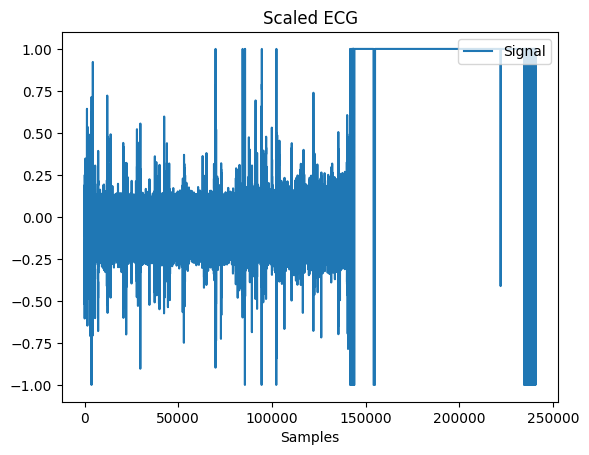

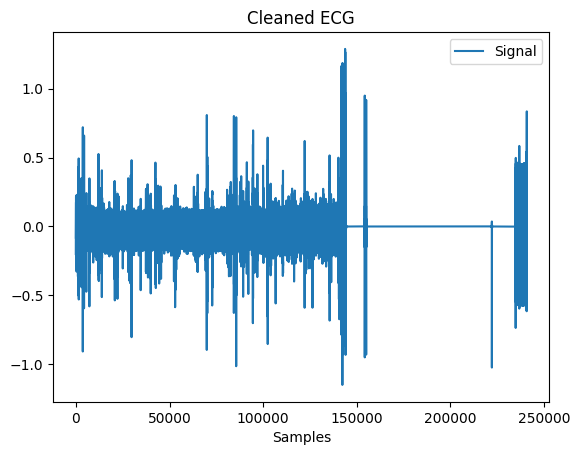

In [368]:
from sklearn.preprocessing import RobustScaler

# Calculate the mean and standard deviation
mean = dataframes[Name]['ECG'].mean()
std_dev = dataframes[Name]['ECG'].std()

remove_outlier = False
if remove_outlier:
    # Define your threshold for deviation from the mean
    threshold = 2

    # Filter out outliers
    outliers_mask = (dataframes[Name]['ECG'] < mean - threshold * std_dev) | (dataframes[Name]['ECG'] > mean + threshold * std_dev)

    outliers = dataframes[Name]['ECG'][outliers_mask]

    filtered_ecg = dataframes[Name]['ECG'][~outliers_mask]

    nk.signal_plot(dataframes[Name]['ECG'])

    fig = plt.gcf()
    plt.title('Raw ECG')

    plt.figure()
    plt.scatter(dataframes[Name]['timestamp'][outliers_mask], outliers, color = 'red')
    plt.scatter(dataframes[Name]['timestamp'][~outliers_mask], filtered_ecg, color = 'blue')
    plt.title('Outlier Removal')
    # Reshape data for the scaler
    data_reshaped = filtered_ecg.values.reshape(-1, 1)
    
else:
    data_reshaped = dataframes[Name]['ECG'].values.reshape(-1, 1)
    
# Initialize the RobustScaler
robust_scaler = RobustScaler()

# Fit and transform the data with RobustScaler
data_robust_scaled = robust_scaler.fit_transform(data_reshaped)

# Manually scale to [-1, 1] based on the robustly scaled data
data_scaled_to_range = np.interp(data_robust_scaled, (data_robust_scaled.min(), data_robust_scaled.max()), (-1, 1))

# Convert back to a pandas series, if needed
ecg_data = pd.Series(data_scaled_to_range.flatten())

nk.signal_plot(ecg_data)

fig = plt.gcf()
plt.title('Scaled ECG')

# Process ecg
ecg_signals, info = nk.ecg_process(ecg_data, sampling_rate = SF, method = 'neurokit')
nk.signal_plot(ecg_signals['ECG_Clean'])
fig = plt.gcf()
plt.title('Cleaned ECG') 



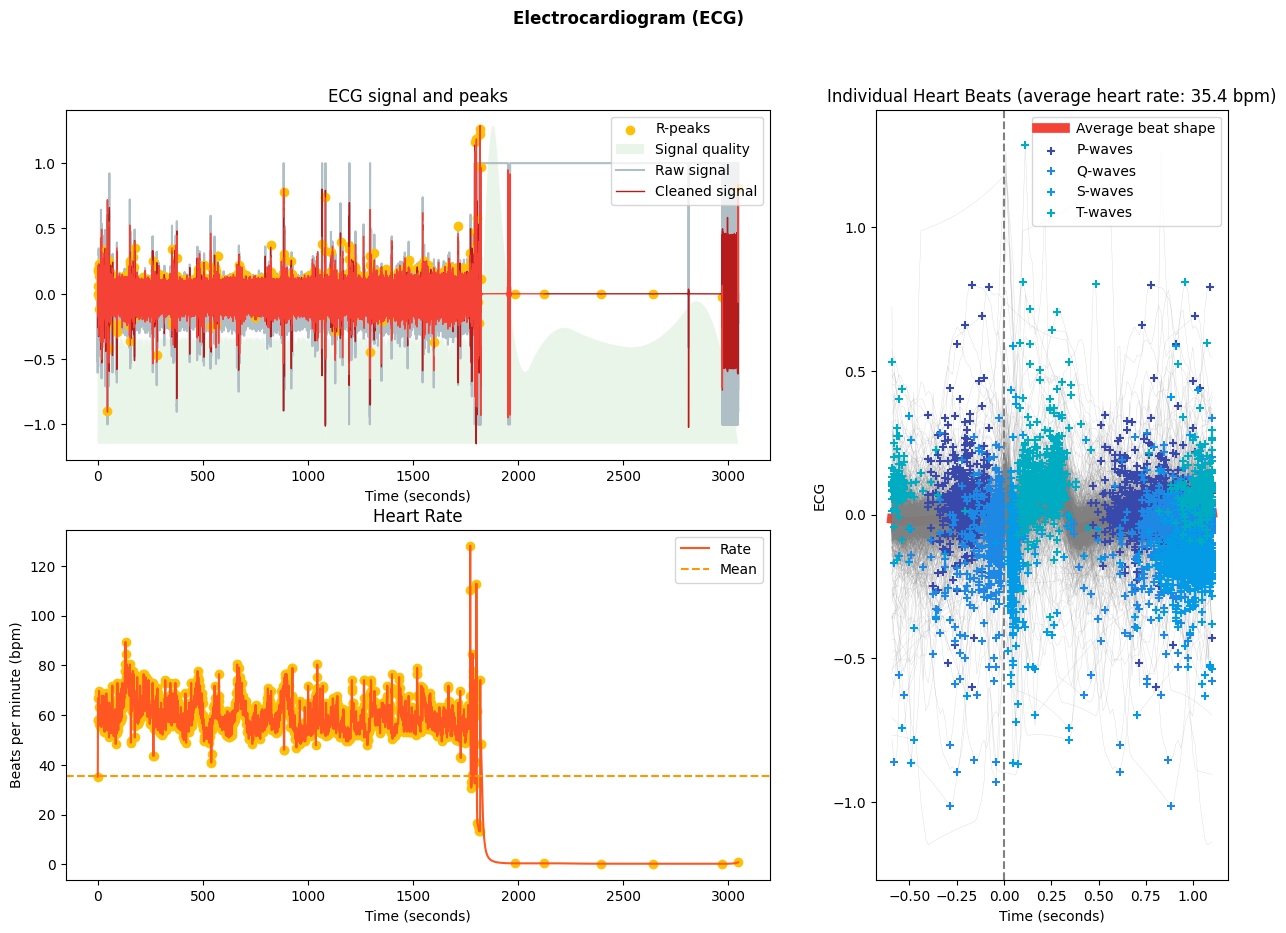

In [369]:
nk.ecg_plot(ecg_signals, info)
fig = plt.gcf()
fig.set_size_inches(15, 10, forward=True)
# fig.savefig("myfig.png")

These features include the RMSSD (square root of the mean of the sum of successive differences between adjacent RR intervals), MeanNN (mean of RR intervals) 

### Interval ECG

MeanNN: The mean of the RR intervals.

SDNN: The standard deviation of the RR intervals.

SDANN1, SDANN2, SDANN5: The standard deviation of average RR intervals extracted from n-minute segments of time series data (1, 2 and 5 by default). Note that these indices require a minimal duration of signal to be computed (3, 6 and 15 minutes respectively) and will be silently skipped if the data provided is too short.

SDNNI1, SDNNI2, SDNNI5: The mean of the standard deviations of RR intervals extracted from n-minute segments of time series data (1, 2 and 5 by default). Note that these indices require a minimal duration of signal to be computed (3, 6 and 15 minutes respectively) and will be silently skipped if the data provided is too short.

RMSSD: The square root of the mean of the squared successive differences between adjacent RR intervals. It is equivalent (although on another scale) to SD1, and therefore it is redundant to report correlations with both (Ciccone, 2017).

SDSD: The standard deviation of the successive differences between RR intervals.

CVNN: The standard deviation of the RR intervals (SDNN) divided by the mean of the RR intervals (MeanNN).

CVSD: The root mean square of successive differences (RMSSD) divided by the mean of the RR intervals (MeanNN).

MedianNN: The median of the RR intervals.

MadNN: The median absolute deviation of the RR intervals.

MCVNN: The median absolute deviation of the RR intervals (MadNN) divided by the median of the RR intervals (MedianNN).

IQRNN: The interquartile range (IQR) of the RR intervals.

SDRMSSD: SDNN / RMSSD, a time-domain equivalent for the low Frequency-to-High Frequency (LF/HF) Ratio (Sollers et al., 2007).

Prc20NN: The 20th percentile of the RR intervals (Han, 2017; Hovsepian, 2015).

Prc80NN: The 80th percentile of the RR intervals (Han, 2017; Hovsepian, 2015).

pNN50: The proportion of RR intervals greater than 50ms, out of the total number of RR intervals.

pNN20: The proportion of RR intervals greater than 20ms, out of the total number of RR intervals.

MinNN: The minimum of the RR intervals (Parent, 2019; Subramaniam, 2022).

MaxNN: The maximum of the RR intervals (Parent, 2019; Subramaniam, 2022).

TINN: A geometrical parameter of the HRV, or more specifically, the baseline width of the RR intervals distribution obtained by triangular interpolation, where the error of least squares determines the triangle. It is an approximation of the RR interval distribution.

HTI: The HRV triangular index, measuring the total number of RR intervals divided by the height of the RR intervals histogram.

In [370]:
epochs = nk.epochs_create(ecg_signals,
                            events = events['onset'],
                            # epochs_start=event_onset_delay,
                            sampling_rate = SF, 
                            baseline_correction=False)

ECG_Features = nk.ecg_intervalrelated(epochs)

c:\Users\lauri\.virtualenvs\AML-dynaMix-AryBn7L8\Lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:474: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(
c:\Users\lauri\.virtualenvs\AML-dynaMix-AryBn7L8\Lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:474: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(
c:\Users\lauri\.virtualenvs\AML-dynaMix-AryBn7L8\Lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:474: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation 

In [371]:
# List of columns to be removed
columns_to_remove = ['HRV_SDANN1', 'HRV_SDNNI1', 'HRV_SDANN2', 'HRV_SDNNI2', 'HRV_SDANN5', 'HRV_SDNNI5','HRV_SDNNI5',"HRV_ULF","HRV_VLF","HRV_LF","HRV_HF","HRV_VHF","HRV_TP","HRV_LFHF","HRV_LFn","HRV_HFn","HRV_LnHF"]

# Drop specified columns
ECG_Features_Clean = ECG_Features.drop(columns=columns_to_remove)

print(ECG_Features_Clean)


   Label  ECG_Rate_Mean             HRV_MeanNN                HRV_SDNN  \
1      1      66.472734  [[71.30327868852459]]   [[8.440251204853425]]   
2      2      61.551088  [[77.08035714285714]]  [[7.5541747814077365]]   
3      3      59.916539  [[79.05504587155963]]   [[6.706595513187444]]   
4      4      60.275874  [[78.53636363636363]]   [[9.067208053469606]]   
5      5      57.318352   [[82.6952380952381]]   [[7.972457165772249]]   
6      6      60.897647             [[77.875]]   [[8.702412423114753]]   
7      7      57.500985  [[82.48571428571428]]   [[5.674020223307765]]   
8      8      60.455661  [[78.43636363636364]]   [[10.54177123561248]]   
9      9      57.326897  [[82.66666666666667]]   [[8.066629582453432]]   
10    10      56.370215  [[84.04854368932038]]   [[5.951402274660757]]   
11    11      57.136135  [[82.92307692307692]]  [[7.8908725786365235]]   
12    12      59.422081   [[79.8256880733945]]   [[6.065757008567527]]   
13    13      59.035879              [

### ECG Derived RSP Features

Returns: 

"RSP_Rate_Mean": the mean respiratory rate.

"RSP_Amplitude_Mean": the mean respiratory amplitude.

"RSP_RRV": the different respiratory rate variability metrices. See below.

"RSP_Phase_Duration_Inspiration": the average inspiratory duration.

"RSP_Phase_Duration_Expiration": the average expiratory duration.

"RSP_Phase_Duration_Ratio ": the inspiratory-to-expiratory time ratio (I/E).

#### RSP_RRV

"RRV_SDBB": the standard deviation of the breath-to-breath intervals.

"RRV_RMSSD": the root mean square of successive differences of the breath-to-breath intervals.

"RRV_SDSD": the standard deviation of the successive differences between adjacent breath-to-breath intervals.

"RRV_BBx": the number of successive interval differences that are greater than x seconds.

"RRV-pBBx": the proportion of breath-to-breath intervals that are greater than x seconds, out of the total number of intervals.

"RRV_VLF": spectral power density pertaining to very low frequency band (i.e., 0 to . 04 Hz) by default.

"RRV_LF": spectral power density pertaining to low frequency band (i.e., .04 to .15 Hz) by default.

"RRV_HF": spectral power density pertaining to high frequency band (i.e., .15 to .4 Hz) by default.

"RRV_LFHF": the ratio of low frequency power to high frequency power.

"RRV_LFn": the normalized low frequency, obtained by dividing the low frequency power by the total power.

"RRV_HFn": the normalized high frequency, obtained by dividing the low frequency power by total power.

"RRV_SD1": SD1 is a measure of the spread of breath-to-breath intervals on the Poincaré plot perpendicular to the line of identity. It is an index of short-term variability.

"RRV_SD2": SD2 is a measure of the spread of breath-to-breath intervals on the Poincaré plot along the line of identity. It is an index of long-term variability.

"RRV_SD2SD1": the ratio between short and long term fluctuations of the breath-to-breath intervals (SD2 divided by SD1).

"RRV_ApEn": the approximate entropy of RRV, calculated by entropy_approximate().

"RRV_SampEn": the sample entropy of RRV, calculated by entropy_sample().

"RRV_DFA_alpha1": the “short-term” fluctuation value generated from Detrended Fluctuation Analysis i.e. the root mean square deviation from the fitted trend of the breath-to-breath intervals. Will only be computed if mora than 160 breath cycles in the signal.

"RRV_DFA_alpha2": the long-term fluctuation value. Will only be computed if mora than 640 breath cycles in the signal.

Text(0, 0.5, 'Breaths Per Minute')

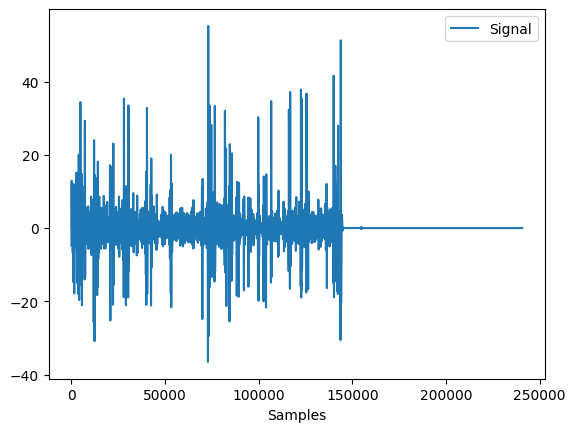

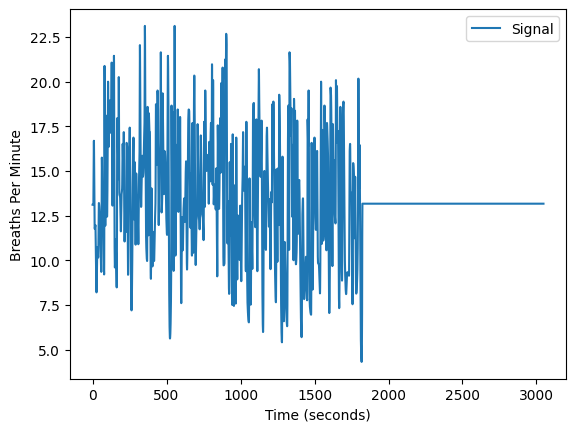

In [372]:
# # Extract peaks
rpeaks, info = nk.ecg_peaks(ecg_signals, sampling_rate=SF)

# Compute rate
ecg_rate = nk.ecg_rate(rpeaks, sampling_rate=SF, desired_length=len(dataframes[Name]["ECG"]))

edr = nk.ecg_rsp(ecg_rate, sampling_rate=SF)

rsp_signals, rsp_info = nk.rsp_process(edr, 
            sampling_rate=SF)

# Visual comparison
nk.signal_plot(rsp_signals['RSP_Clean'])

# Visualize
nk.signal_plot(rsp_signals['RSP_Rate'], sampling_rate=SF)

plt.ylabel('Breaths Per Minute')


RSP interval Related

In [373]:
epochs = nk.epochs_create(rsp_signals,
                            events = events,
                            # epochs_start=event_onset_delay,
                            sampling_rate = SF, 
                            baseline_correction=False)

RSP_Features = nk.rsp_intervalrelated(epochs, sampling_rate=SF)

print(RSP_Features)

# List of columns to be removed
columns_to_remove = []

# Drop specified columns
RSP_Features_Clean = RSP_Features.drop(columns=columns_to_remove)

print(RSP_Features_Clean)

           Label  RSP_Rate_Mean    RRV_RMSSD   RRV_MeanBB     RRV_SDBB  \
95.mp4    95.mp4      17.384053   898.329974  3432.753165   596.276770   
83.mp4    83.mp4      14.164131  1390.913086  4244.401168   928.568009   
24.mp4    24.mp4      15.218036   837.884809  3952.742616   912.126320   
110.mp4  110.mp4      15.781475  1006.849297  3771.308017   665.842495   
53.mp4    53.mp4      14.677267  1712.729581  4118.444846  1020.063082   
73.mp4    73.mp4      14.464035  1610.677632  4142.161636  1142.916641   
64.mp4    64.mp4      15.795050   809.745050  3845.569620   490.068929   
12.mp4    12.mp4      15.441627  1546.774671  3799.415774  1310.079150   
55.mp4    55.mp4      12.401803  1181.725401  4716.915995   941.150481   
44.mp4    44.mp4      15.425935  1215.717185  3977.396022   916.748012   
71.mp4    71.mp4      12.894703  1893.356404  4725.738397  1446.147029   
5.mp4      5.mp4      14.135429  2192.654885  4218.806510  1828.303804   
54.mp4    54.mp4      10.739173  2729.

# PPG

In [374]:
dataframes[Name].keys()

Index(['timestamp', 'ECG', 'GSR', 'PPG_red', 'PPG_ir', 'PPG_green',
       'absolute_time', 'label'],
      dtype='object')

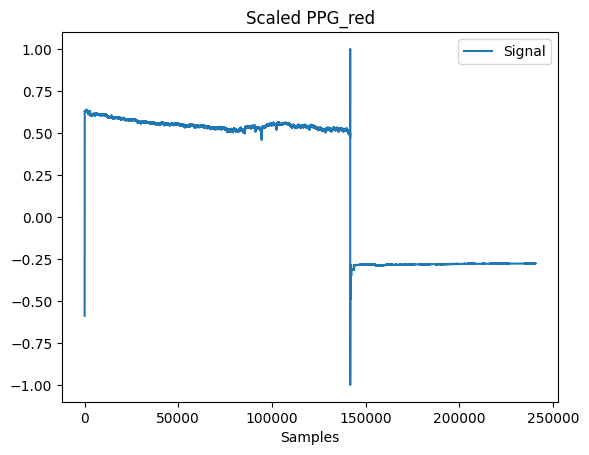

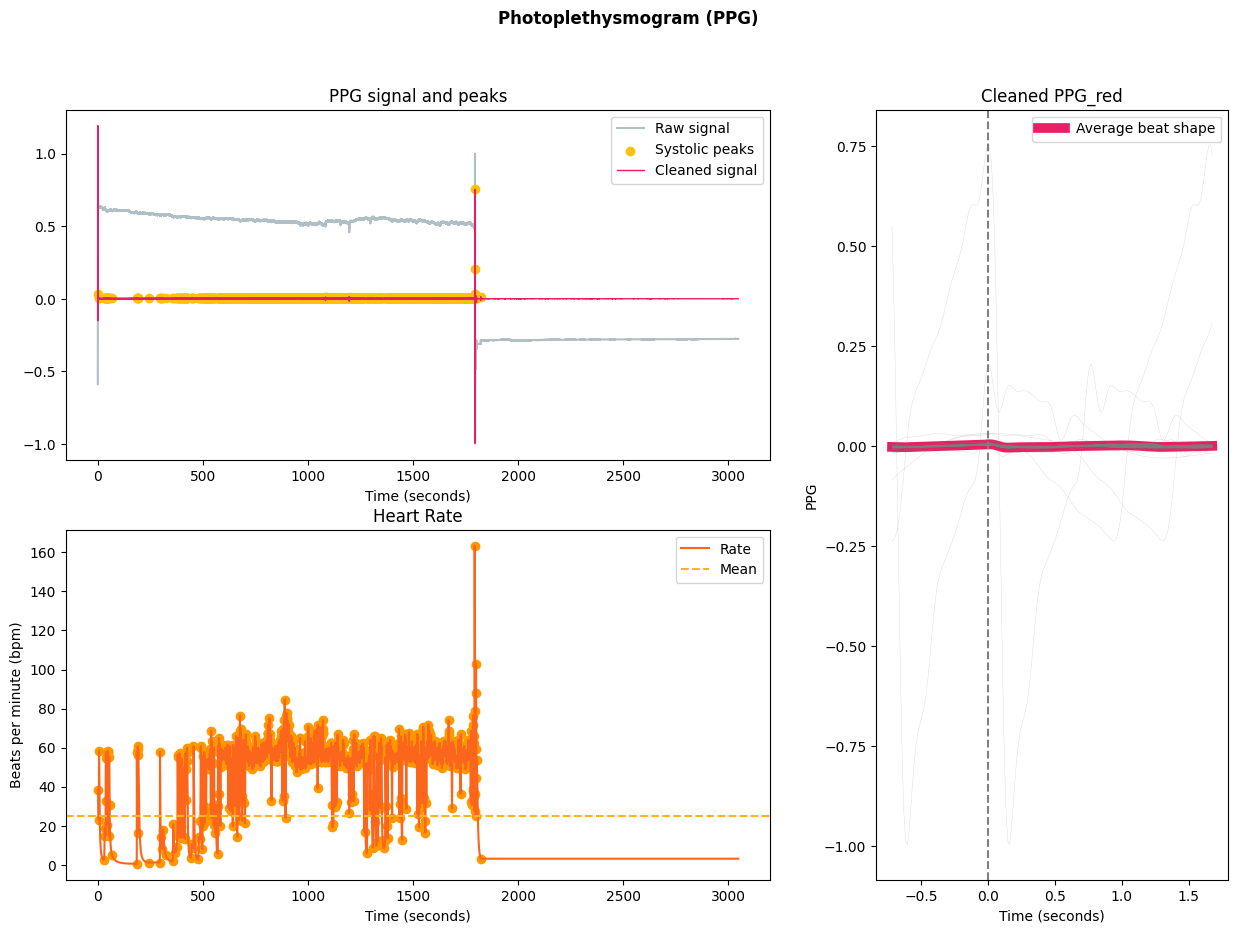

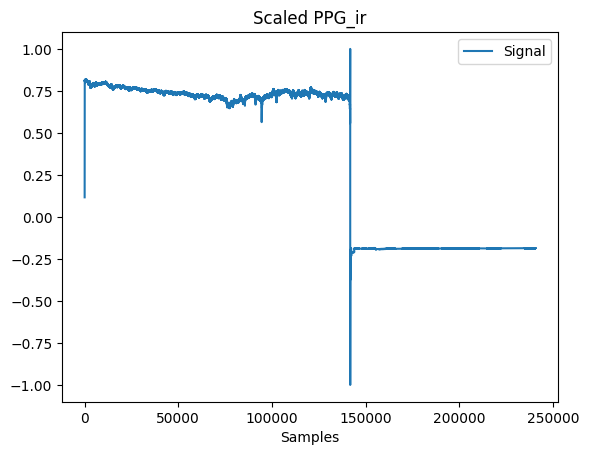

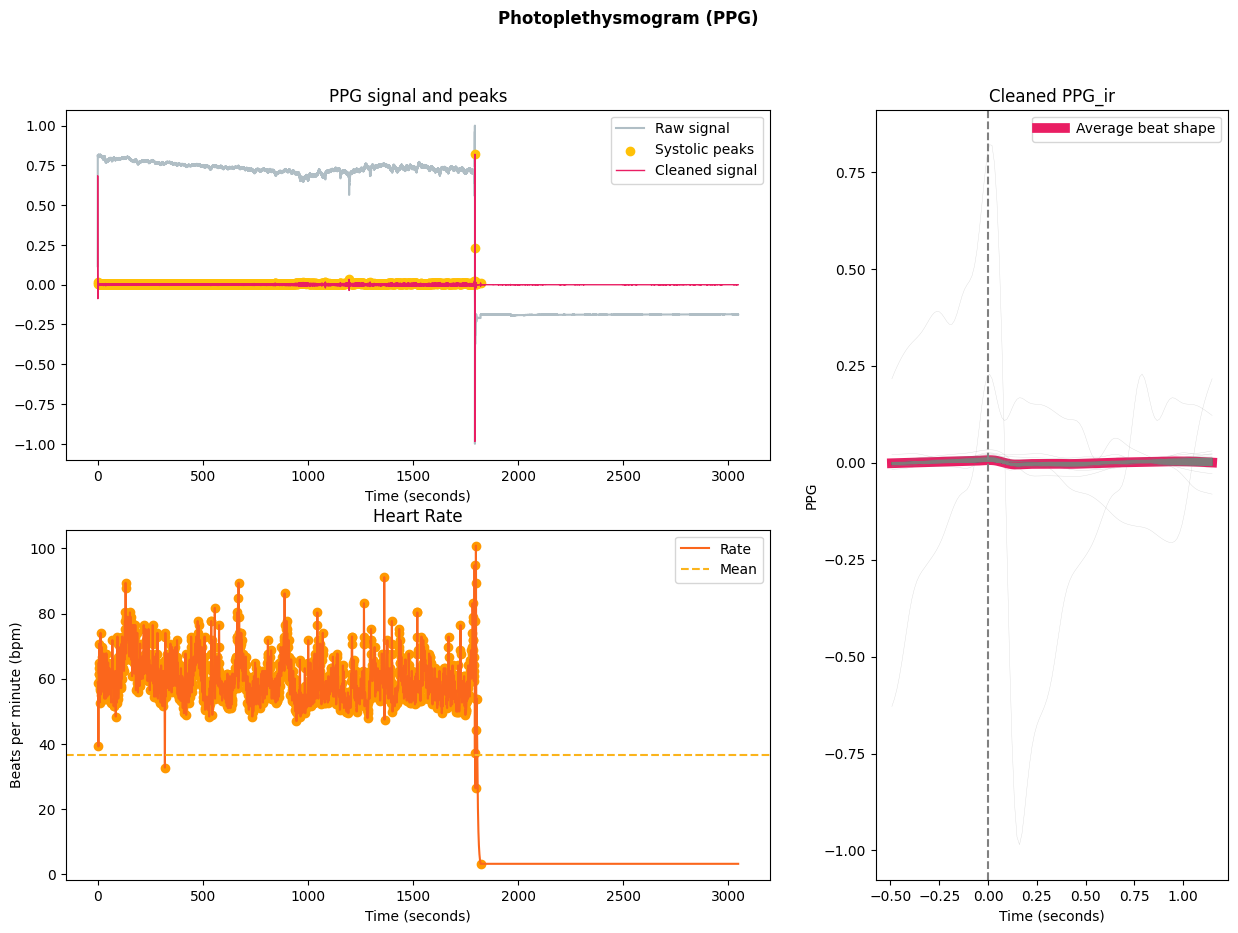

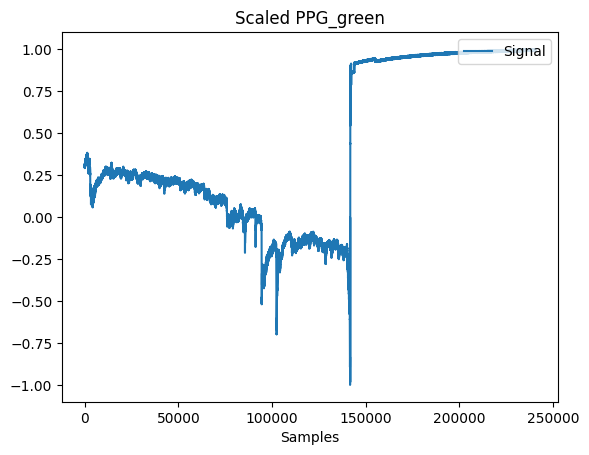

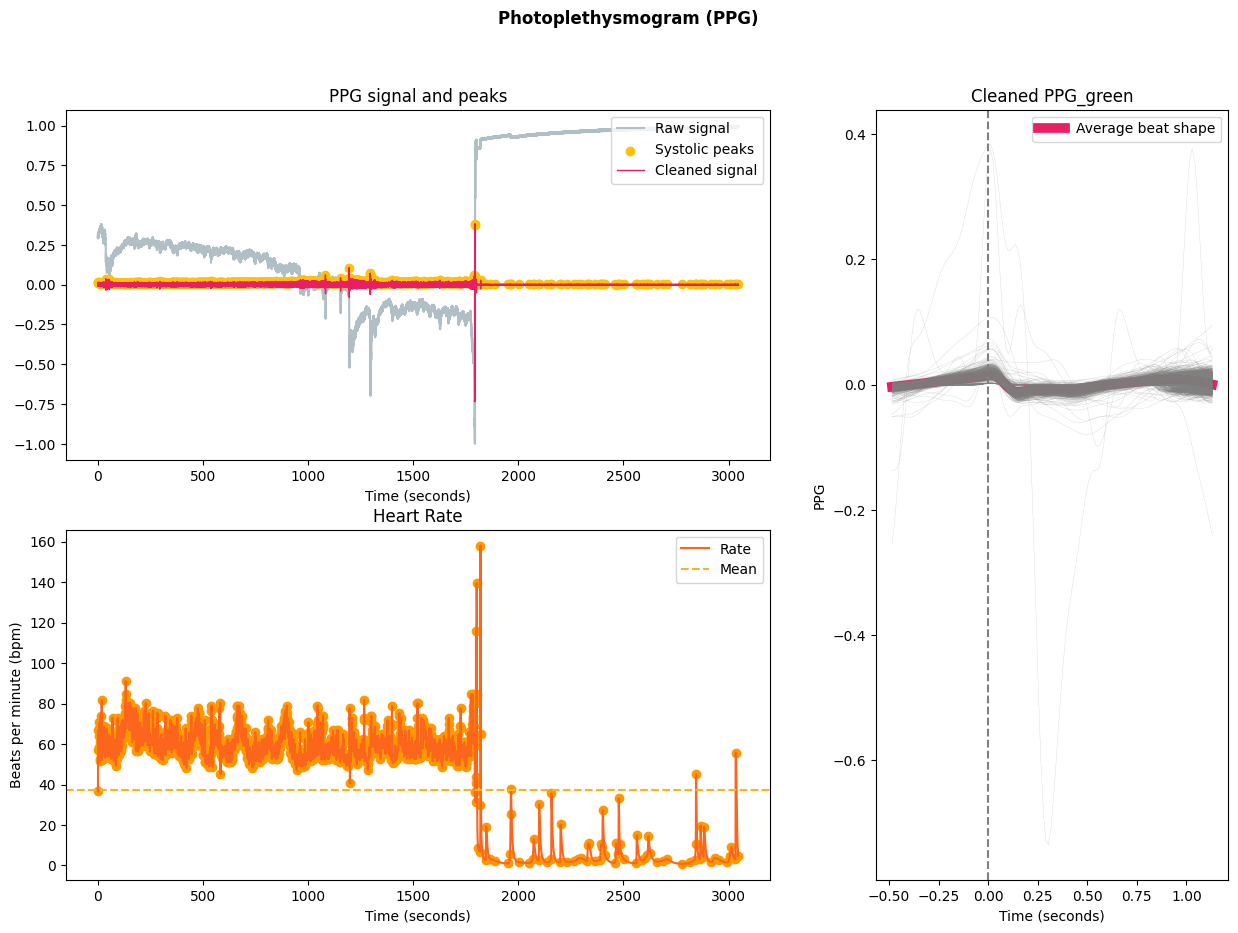

In [375]:
from sklearn.preprocessing import RobustScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import neurokit2 as nk

# Columns to process
columns_to_process = ["PPG_red", "PPG_ir", "PPG_green"]

# Define your threshold for deviation from the mean
threshold = 3

ppg_data = {}
info = {}

for column in columns_to_process:
    
    data = dataframes[Name][column]
    # Calculate the mean and standard deviation for each column
    mean = data.mean()
    std_dev = data.std()

    # Filter out outliers
    outliers_mask = (data < mean - threshold * std_dev) | (data > mean + threshold * std_dev)
    outliers = data[outliers_mask]
    filtered_ppg = data[~outliers_mask]


    # Reshape data for the scaler
    data_reshaped = filtered_ppg.values.reshape(-1, 1)

    # Initialize the RobustScaler
    robust_scaler = RobustScaler()

    # Fit and transform the data with RobustScaler
    data_robust_scaled = robust_scaler.fit_transform(data_reshaped)

    # Manually scale to [-1, 1] based on the robustly scaled data
    data_scaled_to_range = np.interp(data_robust_scaled, (data_robust_scaled.min(), data_robust_scaled.max()), (-1, 1))

    # Convert back to a pandas series
    ppg_data_scaled = pd.Series(data_scaled_to_range.flatten(), name=column + "_scaled")

    # Append the scaled data to dataframes[Name] DataFrame or handle it as needed
    # dataframes[Name].loc[:, column + "_scaled"] = ppg_data_scaled

    # Plotting scaled data
    nk.signal_plot(ppg_data_scaled)  # This line assumes you want to plot with neurokit2, adjust as necessary
    plt.title(f'Scaled {column}')
    
    # Process the PPG data with NeuroKit2
    processed_data, processed_info = nk.ppg_process(ppg_data_scaled, sampling_rate=SF, method='elgendi')
    
    # Store the processed data and info in dictionaries
    ppg_data[column] = processed_data
    info[column] = processed_info

    # Plot the cleaned PPG data
    nk.ppg_plot(processed_data, processed_info)
    plt.gcf().set_size_inches(15, 10, forward=True)
    plt.title(f'Cleaned {column}')
    
plt.show()

In [376]:
columns_to_process = ["PPG_red", "PPG_ir", "PPG_green"]

PPG_Features = {}

for column in columns_to_process:
    # Creating epochs
    
    epochs = nk.epochs_create(ppg_data[column],
                            events = events,
                            sampling_rate = SF,
                            # epochs_start=event_onset_delay,
                            baseline_correction=False)
    
                              
    PPG_Features[column] = nk.ppg_intervalrelated(epochs)


c:\Users\lauri\.virtualenvs\AML-dynaMix-AryBn7L8\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\lauri\.virtualenvs\AML-dynaMix-AryBn7L8\Lib\site-packages\neurokit2\hrv\hrv_time.py:157: RuntimeWarning: Mean of empty slice
  out["MeanNN"] = np.nanmean(rri)
c:\Users\lauri\.virtualenvs\AML-dynaMix-AryBn7L8\Lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
columns_to_process = ["PPG_red", "PPG_ir", "PPG_green"]
# List of columns to be removed
columns_to_remove = ['HRV_SDNN', 'HRV_SDNNI1', 'HRV_SDANN1', 'HRV_SDANN2', 'HRV_SDNNI2', 'HRV_SDANN5', 'HRV_SDNNI5']

PPG_Features_Clean = PPG_Features.copy()

for column in columns_to_process:
    
    # Make a copy of the DataFrame to ensure the original is not modified
    PPG_Features_Clean[column] = PPG_Features[column].copy()

    # Drop specified columns from the copy
    PPG_Features_Clean[column] = PPG_Features_Clean[column].drop(columns=columns_to_remove)

print(PPG_Features_Clean)


{'PPG_red':            Label  PPG_Rate_Mean  HRV_MeanNN  HRV_RMSSD   HRV_SDSD  HRV_CVNN  \
95.mp4    95.mp4      67.967767   69.492537   5.332860   5.373183  0.107667   
83.mp4    83.mp4      64.097379   74.158730   5.122688   5.163252  0.065981   
24.mp4    24.mp4      61.900239   76.606557   7.198379   7.259107  0.073815   
110.mp4  110.mp4      63.559762   74.539683   5.875043   5.922646  0.092062   
53.mp4    53.mp4      60.782367   77.866667   7.220498   7.282157  0.087788   
73.mp4    73.mp4      65.479236   72.384615   4.895789   4.932883  0.081244   
64.mp4    64.mp4      57.540628   82.403509   5.967172   6.021067  0.072008   
12.mp4    12.mp4      65.568336   72.215385   4.751644   4.784829  0.087664   
55.mp4    55.mp4      56.128194   84.327273   7.393691   7.451778  0.085789   
44.mp4    44.mp4      58.258069   81.368421   5.413277   5.462000  0.060593   
71.mp4    71.mp4      57.090645   82.928571   6.587868   6.648561  0.080444   
5.mp4      5.mp4      61.561026   77.366

# GSR

### EDA

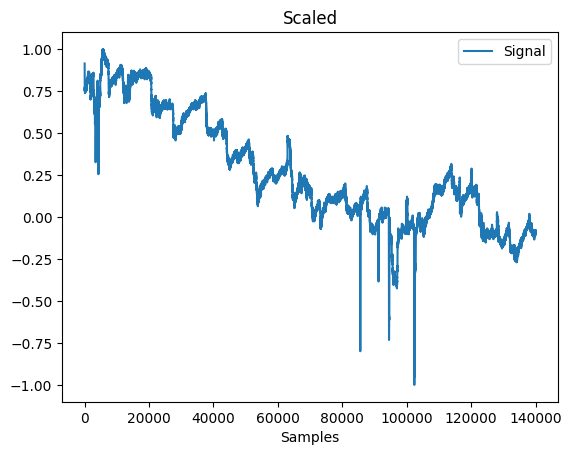

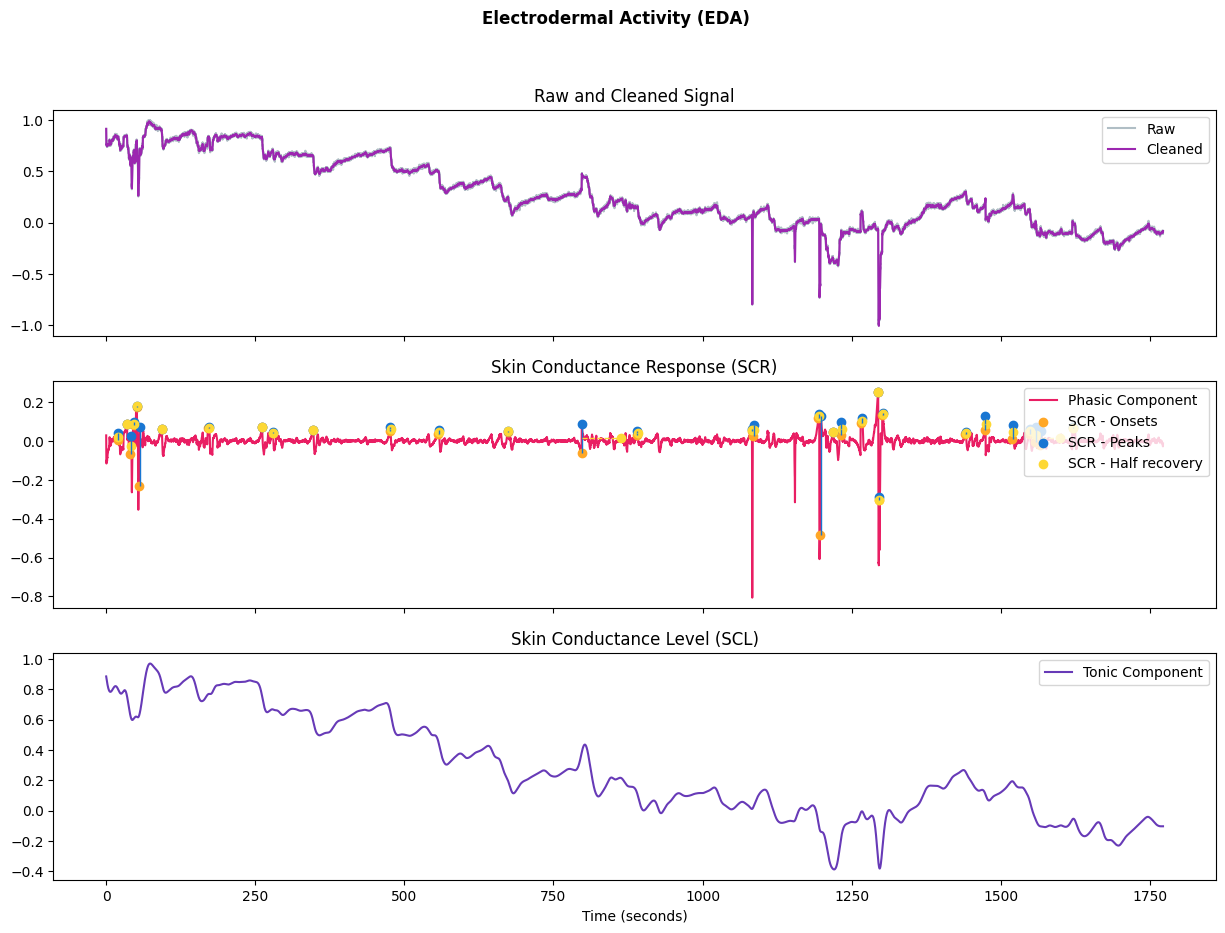

In [ ]:
from sklearn.preprocessing import RobustScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import neurokit2 as nk

# Columns to process
columns_to_process = ["PPG_red", "PPG_ir", "PPG_green"]

# Define your threshold for deviation from the mean
threshold = 8


data = dataframes[Name]['GSR']
# Calculate the mean and standard deviation for each column
mean = data.mean()
std_dev = data.std()

# Filter out outliers
outliers_mask = (data < mean - threshold * std_dev) | (data > mean + threshold * std_dev)
outliers = data[outliers_mask]
filtered_GSR = data[~outliers_mask]

# Plotting
# plt.figure()
# plt.scatter(my_data['timestamp'][outliers_mask], outliers, color='red', label='Outliers')
# plt.scatter(my_data['timestamp'][~outliers_mask], filtered_GSR, color='blue', label='Filtered Data')
# plt.title(f'Outlier Removal for {column}')
# plt.legend()

# Reshape data for the scaler
data_reshaped = filtered_GSR.values.reshape(-1, 1)

# Initialize the RobustScaler
robust_scaler = RobustScaler()

# Fit and transform the data with RobustScaler
data_robust_scaled = robust_scaler.fit_transform(data_reshaped)

# Manually scale to [-1, 1] based on the robustly scaled data
data_scaled_to_range = np.interp(data_robust_scaled, (data_robust_scaled.min(), data_robust_scaled.max()), (-1, 1))

# Convert back to a pandas series
gsr_data_scaled = pd.Series(data_scaled_to_range.flatten())

# Plotting scaled data
nk.signal_plot(gsr_data_scaled)  # This line assumes you want to plot with neurokit2, adjust as necessary
plt.title('Scaled')

# Process the PPG data with NeuroKit2
eda_signals, eda_info = nk.eda_process(gsr_data_scaled, sampling_rate=SF)


# Plot the cleaned PPG data
nk.eda_plot(eda_signals, eda_info)
plt.gcf().set_size_inches(15, 10, forward=True)
    
plt.show()

In [ ]:
# Creating epochs
epochs = nk.epochs_create(eda_signals, 
                            events = events,
                            epochs_start=event_onset_delay, 
                            sampling_rate = SF, 
                            baseline_correction=False)

                            
EDA_Features = nk.eda_intervalrelated(epochs)


print(EDA_Features)

# List of columns to be removed
columns_to_remove = ['EDA_Sympathetic', 'EDA_SympatheticN', 'EDA_Autocorrelation']

# Drop specified columns
EDA_Features_Clean = EDA_Features.drop(columns=columns_to_remove)

           Label  SCR_Peaks_N  SCR_Peaks_Amplitude_Mean  EDA_Tonic_SD  \
95.mp4    95.mp4            1                  0.000804      0.033874   
83.mp4    83.mp4            0                       NaN      0.009042   
24.mp4    24.mp4            1                  0.001390      0.071924   
110.mp4  110.mp4            1                  0.020349      0.023837   
53.mp4    53.mp4            1                  0.022073      0.086095   
73.mp4    73.mp4            1                  0.004492      0.091161   
64.mp4    64.mp4            1                  0.149886      0.063161   
12.mp4    12.mp4            1                  0.020091      0.062914   
55.mp4    55.mp4            0                       NaN      0.022290   
44.mp4    44.mp4            0                       NaN      0.087081   
71.mp4    71.mp4            2                  0.033246      0.116722   
5.mp4      5.mp4            0                       NaN      0.038556   
54.mp4    54.mp4            2                  0.04

In [ ]:
print(EDA_Features_Clean)

           Label  SCR_Peaks_N  SCR_Peaks_Amplitude_Mean  EDA_Tonic_SD
95.mp4    95.mp4            1                  0.000804      0.033874
83.mp4    83.mp4            0                       NaN      0.009042
24.mp4    24.mp4            1                  0.001390      0.071924
110.mp4  110.mp4            1                  0.020349      0.023837
53.mp4    53.mp4            1                  0.022073      0.086095
73.mp4    73.mp4            1                  0.004492      0.091161
64.mp4    64.mp4            1                  0.149886      0.063161
12.mp4    12.mp4            1                  0.020091      0.062914
55.mp4    55.mp4            0                       NaN      0.022290
44.mp4    44.mp4            0                       NaN      0.087081
71.mp4    71.mp4            2                  0.033246      0.116722
5.mp4      5.mp4            0                       NaN      0.038556
54.mp4    54.mp4            2                  0.043422      0.055010
45.mp4    45.mp4    

# Save Feature Data

In [ ]:
print(PPG_Features_Clean)

{'PPG_red':            Label  PPG_Rate_Mean  HRV_MeanNN  HRV_RMSSD   HRV_SDSD  HRV_CVNN  \
95.mp4    95.mp4      67.967767   69.492537   5.332860   5.373183  0.107667   
83.mp4    83.mp4      64.097379   74.158730   5.122688   5.163252  0.065981   
24.mp4    24.mp4      61.900239   76.606557   7.198379   7.259107  0.073815   
110.mp4  110.mp4      63.559762   74.539683   5.875043   5.922646  0.092062   
53.mp4    53.mp4      60.782367   77.866667   7.220498   7.282157  0.087788   
73.mp4    73.mp4      65.479236   72.384615   4.895789   4.932883  0.081244   
64.mp4    64.mp4      57.540628   82.403509   5.967172   6.021067  0.072008   
12.mp4    12.mp4      65.568336   72.215385   4.751644   4.784829  0.087664   
55.mp4    55.mp4      56.128194   84.327273   7.393691   7.451778  0.085789   
44.mp4    44.mp4      58.258069   81.368421   5.413277   5.462000  0.060593   
71.mp4    71.mp4      57.090645   82.928571   6.587868   6.648561  0.080444   
5.mp4      5.mp4      61.561026   77.366

In [ ]:
import json

# Function to convert NumPy types to Python native types for JSON serialization
def convert_np_types(obj):
    if isinstance(obj, np.ndarray):
        return obj.tolist()
    elif isinstance(obj, np.generic):
        return obj.item()
    raise TypeError(f"Object of type '{obj.__class__.__name__}' is not JSON serializable")


# Combine your DataFrames into a dictionary with unique labels
dfs = {
    "ECG Features": ECG_Features_Clean,
    "RSP Features": RSP_Features_Clean,
    "PPG IR Features": PPG_Features_Clean['PPG_ir'],
    "PPG Red Features": PPG_Features_Clean['PPG_red'],
    "PPG Green Features": PPG_Features_Clean['PPG_green'],
    "EDA Features": EDA_Features_Clean,
}

# Convert each DataFrame into a JSON string and store it back in the dictionary
for label, df in dfs.items():
    # Convert DataFrame to a JSON-friendly structure (e.g., records) then to a string
    dfs[label] = df.to_dict(orient="records")

dfs["Video Condition"] = json.dumps(event_conditions)
# Serialize the dictionary to a JSON string
json_str = json.dumps(dfs, indent=4, default=convert_np_types)

# To save the JSON string to a file
with open(f'Features/{name}_Features_ECG.json', 'w') as f:
    f.write(json_str)
